In [20]:
#Libraries
import numpy as np 
import pandas as pd 
import yfinance as yf
import matplotlib.pyplot as plt
from datetime import date
import pandas_datareader as data
from pandas_datareader import *
import math
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [21]:
#Scraping Dataset from Yahoo Finance using yfinance
#Getting data for the Apple Stock
aapl = yf.Ticker("AAPL")

# Apple Company Information
aapl.info

{'zip': '95014',
 'sector': 'Technology',
 'fullTimeEmployees': 100000,
 'longBusinessSummary': 'Apple Inc. designs, manufactures, and markets smartphones, personal computers, tablets, wearables, and accessories worldwide. It also sells various related services. In addition, the company offers iPhone, a line of smartphones; Mac, a line of personal computers; iPad, a line of multi-purpose tablets; AirPods Max, an over-ear wireless headphone; and wearables, home, and accessories comprising AirPods, Apple TV, Apple Watch, Beats products, HomePod, and iPod touch. Further, it provides AppleCare support services; cloud services store services; and operates various platforms, including the App Store that allow customers to discover and download applications and digital content, such as books, music, video, games, and podcasts. Additionally, the company offers various services, such as Apple Arcade, a game subscription service; Apple Music, which offers users a curated listening experience wit

In [22]:
# Apple's Historical Stock Prices
# get historical market data
aapl.dataset = aapl.history(period="max")

aapl.dataset.tail(10)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-03-28,172.169998,175.729996,172.000000,175.600006,90371900,0.0,0.0
2022-03-29,176.690002,179.009995,176.339996,178.960007,100589400,0.0,0.0
2022-03-30,178.550003,179.610001,176.699997,177.770004,92633200,0.0,0.0
2022-03-31,177.839996,178.029999,174.399994,174.610001,103049300,0.0,0.0
2022-04-01,174.029999,174.880005,171.940002,174.309998,78699800,0.0,0.0
2022-04-04,174.570007,178.490005,174.440002,178.440002,76468400,0.0,0.0
2022-04-05,177.500000,178.300003,174.419998,175.059998,73401800,0.0,0.0
2022-04-06,172.360001,173.630005,170.130005,171.830002,89058800,0.0,0.0
2022-04-07,171.160004,173.360001,169.850006,172.139999,77517700,0.0,0.0


In [23]:
#Dropped Columns 'Dividends' and 'Stock Splits'
aapl.dataset.drop(['Dividends', 'Stock Splits'], axis=1)

,Open,High,Low,Close,Volume
Date,,,,,
1980-12-12,0.100323,0.100759,0.100323,0.100323,469033600
1980-12-15,0.095525,0.095525,0.095089,0.095089,175884800
1980-12-16,0.088546,0.088546,0.088110,0.088110,105728000
1980-12-17,0.090291,0.090727,0.090291,0.090291,86441600
1980-12-18,0.092908,0.093345,0.092908,0.092908,73449600
...,...,...,...,...,...
2022-04-04,174.570007,178.490005,174.440002,178.440002,76468400
2022-04-05,177.500000,178.300003,174.419998,175.059998,73401800
2022-04-06,172.360001,173.630005,170.130005,171.830002,89058800


Stochastic Oscillator Indicator

In [24]:
# Calculating %K and %D
aapl.dataset['14-high'] = aapl.dataset['High'].rolling(14).max()
aapl.dataset['14-low'] = aapl.dataset['Low'].rolling(14).min()
aapl.dataset['%K'] = (aapl.dataset['Close'] - aapl.dataset['14-low'])*100/(aapl.dataset['14-high'] - aapl.dataset['14-low'])
aapl.dataset['%D'] = aapl.dataset['%K'].rolling(3).mean()

aapl.dataset.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,14-high,14-low,%K,%D
Date,,,,,,,,,,,
2022-04-04,174.570007,178.490005,174.440002,178.440002,76468400,0.0,0.0,179.610001,154.460007,95.347919,86.757479
2022-04-05,177.500000,178.300003,174.419998,175.059998,73401800,0.0,0.0,179.610001,157.630005,79.299345,85.505065
2022-04-06,172.360001,173.630005,170.130005,171.830002,89058800,0.0,0.0,179.610001,159.759995,60.806064,78.484442
2022-04-07,171.160004,173.360001,169.850006,172.139999,77517700,0.0,0.0,179.610001,163.009995,55.000009,65.035139
2022-04-08,171.779999,171.767197,169.220001,170.565002,30053311,0.0,0.0,179.610001,164.910004,38.469387,51.425153


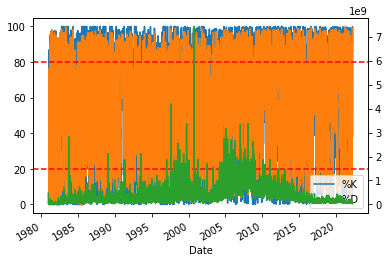

In [25]:
# Plotting Sotchastic Oscillator Indicator Chart
ax = aapl.dataset[['%K', '%D']].plot()
aapl.dataset['Volume'].plot(ax=ax, secondary_y=True)
ax.axhline(20, linestyle='--', color="r")
ax.axhline(80, linestyle="--", color="r")
plt.show()

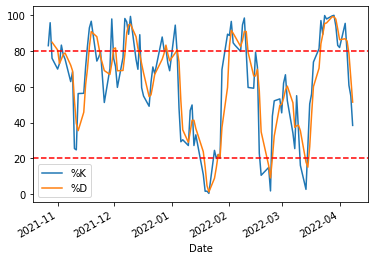

In [26]:
# Plotting Sotchastic Oscillator Indicator Chart- 6 Month Period
aapl.dataset = aapl.history(period="6mo")
# 
# Calculating %K and %D
aapl.dataset['14-high'] = aapl.dataset['High'].rolling(14).max()
aapl.dataset['14-low'] = aapl.dataset['Low'].rolling(14).min()
aapl.dataset['%K'] = (aapl.dataset['Close'] - aapl.dataset['14-low'])*100/(aapl.dataset['14-high'] - aapl.dataset['14-low'])
aapl.dataset['%D'] = aapl.dataset['%K'].rolling(3).mean()

# Graphs
ax = aapl.dataset[['%K', '%D']].plot()

ax.axhline(20, linestyle='--', color="r")
ax.axhline(80, linestyle="--", color="r")
plt.show()

In [27]:
aapl.dataset.drop(['Dividends', 'Stock Splits'], axis=1)
aapl.dataset.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,14-high,14-low,%K,%D
Date,,,,,,,,,,,
2022-04-04,174.570007,178.490005,174.440002,178.440002,76468400,0.0,0,179.610001,154.460007,95.347919,86.757479
2022-04-05,177.500000,178.300003,174.419998,175.059998,73401800,0.0,0,179.610001,157.630005,79.299345,85.505065
2022-04-06,172.360001,173.630005,170.130005,171.830002,89058800,0.0,0,179.610001,159.759995,60.806064,78.484442
2022-04-07,171.160004,173.360001,169.850006,172.139999,77517700,0.0,0,179.610001,163.009995,55.000009,65.035139
2022-04-08,171.779999,171.767197,169.220001,170.559998,30060397,0.0,0,179.610001,164.910004,38.435341,51.413804


In [28]:
# # Adding Buy/Sell Signals from Sotchastic Oscillator Indicator
# def categorise(row):  
#     if row['%K'] <= 20 and row['%D'] <= 20 or row['%D'] >= row['%K']:
#         return 'Buy'
#     elif row['%K'] >= 80 and  row['%D']>= 80 or row['%K'] >= row['%D']:
#         return 'Sell'
#     elif row['%K'] < 80 and  row['%K'] > 20 and row['%D'] < 80 and row['%D'] > 20:
#         return 'Hold'

    
   
# aapl.dataset['SO Indicator'] = aapl.dataset.apply(lambda row: categorise(row), axis=1)

# aapl.dataset.tail(10)

Adjusting the SO Indicator so it is more suitable for beigneer

In [29]:
# Adding Buy/Sell Signals from Sotchastic Oscillator Indicator
def categorise(row):  
    if row['%K'] <= 20 and row['%D'] <= 20:
        return 'Buy'
    elif row['%K'] >= 80 and  row['%D']>= 80:
        return 'Sell'
    else:
        return 'Hold'

    
   
aapl.dataset['SO Indicator'] = aapl.dataset.apply(lambda row: categorise(row), axis=1)

aapl.dataset.tail(10)

,Open,High,Low,Close,Volume,Dividends,Stock Splits,14-high,14-low,%K,%D,SO Indicator
Date,,,,,,,,,,,,
2022-03-28,172.169998,175.729996,172.000000,175.600006,90371900,0.0,0,175.729996,150.100006,99.492822,98.992565,Sell
2022-03-29,176.690002,179.009995,176.339996,178.960007,100589400,0.0,0,179.009995,150.100006,99.827092,99.031979,Sell
2022-03-30,178.550003,179.610001,176.699997,177.770004,92633200,0.0,0,179.610001,150.100006,93.764837,97.694917,Sell
2022-03-31,177.839996,178.029999,174.399994,174.610001,103049300,0.0,0,179.610001,150.100006,83.056588,92.216172,Sell
2022-04-01,174.029999,174.880005,171.940002,174.309998,78699800,0.0,0,179.610001,150.380005,81.867931,86.229785,Sell
2022-04-04,174.570007,178.490005,174.440002,178.440002,76468400,0.0,0,179.610001,154.460007,95.347919,86.757479,Sell
2022-04-05,177.500000,178.300003,174.419998,175.059998,73401800,0.0,0,179.610001,157.630005,79.299345,85.505065,Hold
2022-04-06,172.360001,173.630005,170.130005,171.830002,89058800,0.0,0,179.610001,159.759995,60.806064,78.484442,Hold
2022-04-07,171.160004,173.360001,169.850006,172.139999,77517700,0.0,0,179.610001,163.009995,55.000009,65.035139,Hold


In [30]:
# Distrubition of the Indicator
print(aapl.dataset['SO Indicator'].value_counts())

Hold    98
Sell    22
Buy      7
Name: SO Indicator, dtype: int64


Relative Strenght Index

In [31]:
delta = aapl.dataset['Close'].diff()
up = delta.clip(lower=0)
down = -1*delta.clip(upper=0)
ema_up = up.ewm(com=13, adjust=False).mean()
ema_down = down.ewm(com=13, adjust=False).mean()
rs = ema_up/ema_down
aapl.dataset['RSI'] = 100 - (100/(1 + rs))

In [32]:
aapl.dataset.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,14-high,14-low,%K,%D,SO Indicator,RSI
Date,,,,,,,,,,,,,
2022-04-04,174.570007,178.490005,174.440002,178.440002,76468400,0.0,0,179.610001,154.460007,95.347919,86.757479,Sell,63.774266
2022-04-05,177.500000,178.300003,174.419998,175.059998,73401800,0.0,0,179.610001,157.630005,79.299345,85.505065,Hold,57.850130
2022-04-06,172.360001,173.630005,170.130005,171.830002,89058800,0.0,0,179.610001,159.759995,60.806064,78.484442,Hold,52.802332
2022-04-07,171.160004,173.360001,169.850006,172.139999,77517700,0.0,0,179.610001,163.009995,55.000009,65.035139,Hold,53.224184
2022-04-08,171.779999,171.767197,169.220001,170.559998,30060397,0.0,0,179.610001,164.910004,38.435341,51.413804,Hold,50.735141


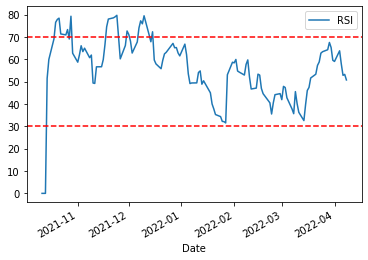

In [33]:
# Graphs
ax = aapl.dataset[['RSI']].plot()

ax.axhline(30, linestyle='--', color="r")
ax.axhline(70, linestyle="--", color="r")
plt.show()

In [34]:
# Adding Buy/Sell Signals from RSI Indicator
def categorise_rsi(row):  
    if row['RSI'] <= 30:
        return 'Buy'
    elif row['RSI'] >= 70:
        return 'Sell'
    elif row['RSI'] < 70:
        return 'Hold'
    elif row['RSI'] > 30:
        return 'Hold'    

    
   
aapl.dataset['RSI Indicator'] = aapl.dataset.apply(lambda row: categorise_rsi(row), axis=1)

aapl.dataset.tail(10)

,Open,High,Low,Close,Volume,Dividends,Stock Splits,14-high,14-low,%K,%D,SO Indicator,RSI,RSI Indicator
Date,,,,,,,,,,,,,,
2022-03-28,172.169998,175.729996,172.000000,175.600006,90371900,0.0,0,175.729996,150.100006,99.492822,98.992565,Sell,64.262560,Hold
2022-03-29,176.690002,179.009995,176.339996,178.960007,100589400,0.0,0,179.009995,150.100006,99.827092,99.031979,Sell,67.513708,Hold
2022-03-30,178.550003,179.610001,176.699997,177.770004,92633200,0.0,0,179.610001,150.100006,93.764837,97.694917,Sell,65.249665,Hold
2022-03-31,177.839996,178.029999,174.399994,174.610001,103049300,0.0,0,179.610001,150.100006,83.056588,92.216172,Sell,59.539816,Hold
2022-04-01,174.029999,174.880005,171.940002,174.309998,78699800,0.0,0,179.610001,150.380005,81.867931,86.229785,Sell,59.011847,Hold
2022-04-04,174.570007,178.490005,174.440002,178.440002,76468400,0.0,0,179.610001,154.460007,95.347919,86.757479,Sell,63.774266,Hold
2022-04-05,177.500000,178.300003,174.419998,175.059998,73401800,0.0,0,179.610001,157.630005,79.299345,85.505065,Hold,57.850130,Hold
2022-04-06,172.360001,173.630005,170.130005,171.830002,89058800,0.0,0,179.610001,159.759995,60.806064,78.484442,Hold,52.802332,Hold
2022-04-07,171.160004,173.360001,169.850006,172.139999,77517700,0.0,0,179.610001,163.009995,55.000009,65.035139,Hold,53.224184,Hold


In [35]:
# Distrubition of the Indicator
print(aapl.dataset['RSI Indicator'].value_counts())

Hold    103
Sell     20
Buy       3
Name: RSI Indicator, dtype: int64


Bollinger Bands

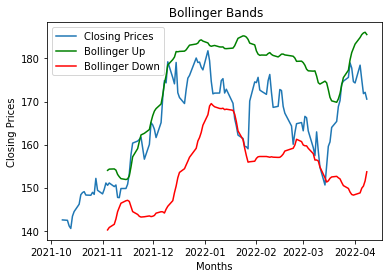

In [36]:
def get_sma(prices, rate):
    return prices.rolling(rate).mean()

def get_bollinger_bands(prices, rate=20):
    # SMA for 20 Days 
    sma = get_sma(prices, rate)
    std = prices.rolling(rate).std()

    # Calculate top band
    bollinger_up = sma + std * 2 

    # Calculate bottom band
    bollinger_down = sma - std * 2 
    return bollinger_up, bollinger_down


closing_prices = aapl.dataset['Close']
bollinger_up, bollinger_down = get_bollinger_bands(closing_prices)

#Plotting the  Bollinger Bands
plt.title(' Bollinger Bands')
plt.xlabel('Months')
plt.ylabel('Closing Prices')
plt.plot(closing_prices, label='Closing Prices')
plt.plot(bollinger_up, label='Bollinger Up', c='g')
plt.plot(bollinger_down, label='Bollinger Down', c='r')
plt.legend()
plt.show()

In [37]:
#Adding Bollinger Bands to the Dataset
aapl.dataset['bollinger_up'] = bollinger_up
aapl.dataset['bollinger_down'] = bollinger_down

aapl.dataset.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,14-high,14-low,%K,%D,SO Indicator,RSI,RSI Indicator,bollinger_up,bollinger_down
Date,,,,,,,,,,,,,,,,
2022-04-04,174.570007,178.490005,174.440002,178.440002,76468400,0.0,0,179.610001,154.460007,95.347919,86.757479,Sell,63.774266,Hold,184.859759,148.783243
2022-04-05,177.500000,178.300003,174.419998,175.059998,73401800,0.0,0,179.610001,157.630005,79.299345,85.505065,Hold,57.850130,Hold,185.531431,149.873570
2022-04-06,172.360001,173.630005,170.130005,171.830002,89058800,0.0,0,179.610001,159.759995,60.806064,78.484442,Hold,52.802332,Hold,185.919297,150.373705
2022-04-07,171.160004,173.360001,169.850006,172.139999,77517700,0.0,0,179.610001,163.009995,55.000009,65.035139,Hold,53.224184,Hold,186.083449,151.571553
2022-04-08,171.779999,171.767197,169.220001,170.559998,30060397,0.0,0,179.610001,164.910004,38.435341,51.413804,Hold,50.735141,Hold,185.553929,153.684073


In [38]:
# Adding Buy/Sell Signals from Bollinger Bands Indicator
def categorise_bollinger(row):  
    if row['Close'] < row['bollinger_down']:
        return 'Buy'
    elif row['Close'] > row['bollinger_up']:
        return 'Sell'
    else:
        return 'Hold'
    
   
aapl.dataset['Bollinger Indicator'] = aapl.dataset.apply(lambda row: categorise_bollinger(row), axis=1)

aapl.dataset.tail(10)

,Open,High,Low,Close,Volume,Dividends,Stock Splits,14-high,14-low,%K,%D,SO Indicator,RSI,RSI Indicator,bollinger_up,bollinger_down,Bollinger Indicator
Date,,,,,,,,,,,,,,,,,
2022-03-28,172.169998,175.729996,172.000000,175.600006,90371900,0.0,0,175.729996,150.100006,99.492822,98.992565,Sell,64.262560,Hold,177.264225,149.815776,Hold
2022-03-29,176.690002,179.009995,176.339996,178.960007,100589400,0.0,0,179.009995,150.100006,99.827092,99.031979,Sell,67.513708,Hold,179.682926,148.973075,Hold
2022-03-30,178.550003,179.610001,176.699997,177.770004,92633200,0.0,0,179.610001,150.100006,93.764837,97.694917,Sell,65.249665,Hold,181.363986,148.413016,Hold
2022-03-31,177.839996,178.029999,174.399994,174.610001,103049300,0.0,0,179.610001,150.100006,83.056588,92.216172,Sell,59.539816,Hold,182.343342,148.271661,Hold
2022-04-01,174.029999,174.880005,171.940002,174.309998,78699800,0.0,0,179.610001,150.380005,81.867931,86.229785,Sell,59.011847,Hold,183.329145,148.399858,Hold
2022-04-04,174.570007,178.490005,174.440002,178.440002,76468400,0.0,0,179.610001,154.460007,95.347919,86.757479,Sell,63.774266,Hold,184.859759,148.783243,Hold
2022-04-05,177.500000,178.300003,174.419998,175.059998,73401800,0.0,0,179.610001,157.630005,79.299345,85.505065,Hold,57.850130,Hold,185.531431,149.873570,Hold
2022-04-06,172.360001,173.630005,170.130005,171.830002,89058800,0.0,0,179.610001,159.759995,60.806064,78.484442,Hold,52.802332,Hold,185.919297,150.373705,Hold
2022-04-07,171.160004,173.360001,169.850006,172.139999,77517700,0.0,0,179.610001,163.009995,55.000009,65.035139,Hold,53.224184,Hold,186.083449,151.571553,Hold


In [39]:
# Distrubition of the Indicator
print(aapl.dataset['Bollinger Indicator'].value_counts())

Hold    114
Sell      8
Buy       5
Name: Bollinger Indicator, dtype: int64


In [41]:
#Cleaned Up Dataset Including Date, Closing Price and the Indicators
cleaned_dataset = aapl.dataset[['Close', 'RSI','RSI Indicator', '%K', '%D','SO Indicator', 'Bollinger Indicator']].copy()
cleaned_dataset.tail()

,Close,RSI Indicator,SO Indicator,Bollinger Indicator
Date,,,,
2022-04-04,178.440002,Hold,Sell,Hold
2022-04-05,175.059998,Hold,Hold,Hold
2022-04-06,171.830002,Hold,Hold,Hold
2022-04-07,172.139999,Hold,Hold,Hold
2022-04-08,170.559998,Hold,Hold,Hold


In [46]:
# Recommender Based on the three indicators
def recommender(row):  
    if row['RSI Indicator'] == "Buy" and row['SO Indicator'] == 'Buy' and  row['Bollinger Indicator'] == 'Buy':
        return 'Buy'
    elif row['RSI Indicator'] == 'Sell' and row['SO Indicator'] == 'Sell' and  row['Bollinger Indicator'] == 'Sell':
        return 'Sell'
    elif row['RSI Indicator'] == 'Hold' and row['SO Indicator'] == 'Hold' and  row['Bollinger Indicator'] == 'Hold':
        return 'Hold'
    elif row['RSI Indicator'] == 'Buy' and row['SO Indicator'] == 'Buy':
        return 'Buy'
    elif row['RSI Indicator'] == 'Sell' and row['SO Indicator'] == 'Sell':
        return 'Sell'
    else:
        return 'Unclassed'

cleaned_dataset['Recommender'] = cleaned_dataset.apply(lambda row: recommender(row), axis=1)

cleaned_dataset.tail(10)

,Close,RSI Indicator,SO Indicator,Bollinger Indicator,Recommender
Date,,,,,
2022-03-28,175.600006,Hold,Sell,Hold,Unclassed
2022-03-29,178.960007,Hold,Sell,Hold,Unclassed
2022-03-30,177.770004,Hold,Sell,Hold,Unclassed
2022-03-31,174.610001,Hold,Sell,Hold,Unclassed
2022-04-01,174.309998,Hold,Sell,Hold,Unclassed
2022-04-04,178.440002,Hold,Sell,Hold,Unclassed
2022-04-05,175.059998,Hold,Hold,Hold,Hold
2022-04-06,171.830002,Hold,Hold,Hold,Hold
2022-04-07,172.139999,Hold,Hold,Hold,Hold


In [47]:
# Distrubition of the Recommender
print(cleaned_dataset['Recommender'].value_counts())

Hold         77
Unclassed    45
Sell          5
Name: Recommender, dtype: int64


In [ ]:
# Export the Clean Dataset with the Indicators
cleaned_dataset.to_csv('clean_dataset.csv')